In [11]:
import numpy as np

p = 8
x0 = p
xn = p + 7
n = 20
h = (xn - x0) / n


def f(x):
    return (1 / p) * np.cos(x - p)


x_nodes = np.linspace(x0, xn, n + 1)
y_nodes = f(x_nodes)

# Збереження у файл
np.savetxt("nodes.txt", np.column_stack(
    (x_nodes, y_nodes)), header="x y", comments='')

# Вивід
print("Таблиця вузлів (x, y):")
for xi, yi in zip(x_nodes, y_nodes):
    print(f"x = {xi:.4f}, y = {yi:.4f}")

Таблиця вузлів (x, y):
x = 8.0000, y = 0.1250
x = 8.3500, y = 0.1174
x = 8.7000, y = 0.0956
x = 9.0500, y = 0.0622
x = 9.4000, y = 0.0212
x = 9.7500, y = -0.0223
x = 10.1000, y = -0.0631
x = 10.4500, y = -0.0963
x = 10.8000, y = -0.1178
x = 11.1500, y = -0.1250
x = 11.5000, y = -0.1171
x = 11.8500, y = -0.0949
x = 12.2000, y = -0.0613
x = 12.5500, y = -0.0202
x = 12.9000, y = 0.0233
x = 13.2500, y = 0.0640
x = 13.6000, y = 0.0969
x = 13.9500, y = 0.1181
x = 14.3000, y = 0.1250
x = 14.6500, y = 0.1167
x = 15.0000, y = 0.0942


In [12]:
def solve_tridiagonal_system(a, b, c, d):
    n = len(b)
    cp = np.zeros(n)
    dp = np.zeros(n)
    
    cp[0] = c[0] / b[0]
    dp[0] = d[0] / b[0]
    
    for i in range(1, n):
        denom = b[i] - a[i - 1] * cp[i - 1]
        cp[i] = c[i] / denom if i < n - 1 else 0
        dp[i] = (d[i] - a[i - 1] * dp[i - 1]) / denom
    
    x = np.zeros(n)
    x[-1] = dp[-1]
    
    for i in reversed(range(n - 1)):
        x[i] = dp[i] - cp[i] * x[i + 1]
    
    return x

In [13]:
h_arr = np.diff(x_nodes)

# Формування системи
a_diag = h_arr[1:]
b_diag = 2 * (h_arr[:-1] + h_arr[1:])
c_diag = h_arr[1:]
d_rhs = 3 * ((y_nodes[2:] - y_nodes[1:-1]) / h_arr[1:] -
             (y_nodes[1:-1] - y_nodes[:-2]) / h_arr[:-1])

# Знаходження c
c_internal = solve_tridiagonal_system(a_diag, b_diag, c_diag, d_rhs)
c = np.zeros(n + 1)
c[1:n] = c_internal

# Знаходження b, d
a = y_nodes[:-1]
b = np.zeros(n)
d_ = np.zeros(n)

for i in range(n):
    b[i] = (y_nodes[i + 1] - y_nodes[i]) / h_arr[i] - \
        h_arr[i] * (2 * c[i] + c[i + 1]) / 3
    d_[i] = (c[i + 1] - c[i]) / (3 * h_arr[i])

print("Коефіцієнти сплайнів:")
for i in range(n):
    print(f"[{i}]: a={a[i]:.4f}, b={b[i]:.4f}, c={c[i]:.4f}, d={d_[i]:.4f}")

Коефіцієнти сплайнів:
[0]: a=0.1250, b=-0.0128, c=0.0000, d=-0.0726
[1]: a=0.1174, b=-0.0394, c=-0.0762, d=0.0309
[2]: a=0.0956, b=-0.0814, c=-0.0438, d=0.0106
[3]: a=0.0622, b=-0.1082, c=-0.0326, d=0.0212
[4]: a=0.0212, b=-0.1232, c=-0.0104, d=0.0205
[5]: a=-0.0223, b=-0.1230, c=0.0112, d=0.0197
[6]: a=-0.0631, b=-0.1079, c=0.0319, d=0.0159
[7]: a=-0.0963, b=-0.0797, c=0.0486, d=0.0104
[8]: a=-0.1178, b=-0.0419, c=0.0595, d=0.0035
[9]: a=-0.1250, b=0.0011, c=0.0631, d=-0.0038
[10]: a=-0.1171, b=0.0438, c=0.0591, d=-0.0106
[11]: a=-0.0949, b=0.0813, c=0.0479, d=-0.0162
[12]: a=-0.0613, b=0.1089, c=0.0310, d=-0.0198
[13]: a=-0.0202, b=0.1233, c=0.0102, d=-0.0209
[14]: a=0.0233, b=0.1228, c=-0.0118, d=-0.0197
[15]: a=0.0640, b=0.1073, c=-0.0324, d=-0.0155
[16]: a=0.0969, b=0.0790, c=-0.0487, d=-0.0113
[17]: a=0.1181, b=0.0407, c=-0.0606, d=0.0008
[18]: a=0.1250, b=-0.0014, c=-0.0597, d=-0.0114
[19]: a=0.1167, b=-0.0474, c=-0.0717, d=0.0683


In [14]:
N = 20 * n
x_dense = np.linspace(x0, xn, N + 1)
y_true = f(x_dense)
y_approx = np.zeros_like(x_dense)

for i, x in enumerate(x_dense):
    idx = np.searchsorted(x_nodes, x) - 1
    idx = min(max(idx, 0), n - 1)
    dx = x - x_nodes[idx]
    y_approx[i] = a[idx] + b[idx] * dx + c[idx] * dx**2 + d_[idx] * dx**3

error = np.abs(y_true - y_approx)

# Вивід
print("\nЧастина табуляції:")
for i in range(0, len(x_dense), len(x_dense) // 10):
    print(
        f"x = {x_dense[i]:.4f}, f(x) = {y_true[i]:.4f}, S(x) = {y_approx[i]:.4f}, error = {error[i]:.2e}")


Частина табуляції:
x = 8.0000, f(x) = 0.1250, S(x) = 0.1250, error = 0.00e+00
x = 8.7000, f(x) = 0.0956, S(x) = 0.0956, error = 0.00e+00
x = 9.4000, f(x) = 0.0212, S(x) = 0.0212, error = 3.47e-18
x = 10.1000, f(x) = -0.0631, S(x) = -0.0631, error = 0.00e+00
x = 10.8000, f(x) = -0.1178, S(x) = -0.1178, error = 0.00e+00
x = 11.5000, f(x) = -0.1171, S(x) = -0.1171, error = 1.39e-17
x = 12.2000, f(x) = -0.0613, S(x) = -0.0613, error = 0.00e+00
x = 12.9000, f(x) = 0.0233, S(x) = 0.0233, error = 0.00e+00
x = 13.6000, f(x) = 0.0969, S(x) = 0.0969, error = 0.00e+00
x = 14.3000, f(x) = 0.1250, S(x) = 0.1250, error = 0.00e+00
x = 15.0000, f(x) = 0.0942, S(x) = 0.0942, error = 0.00e+00


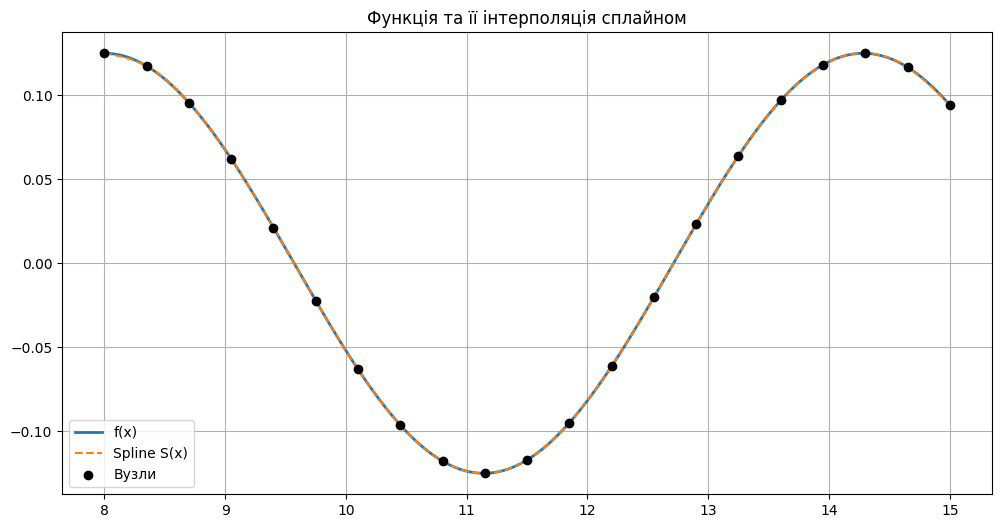

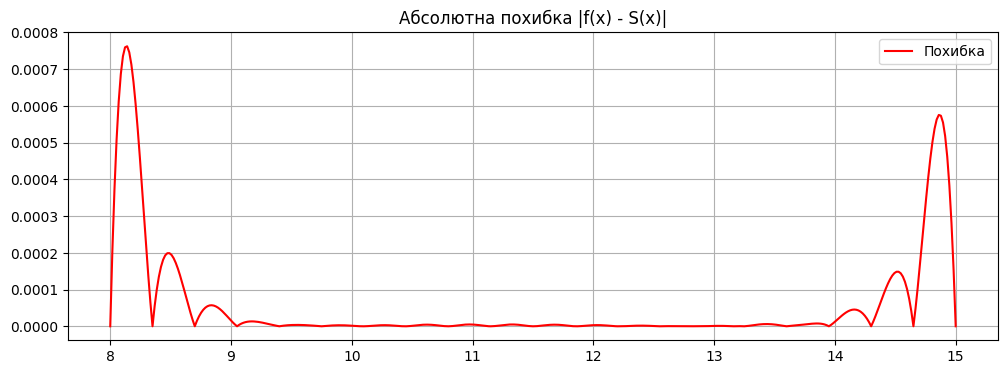

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(x_dense, y_true, label="f(x)", linewidth=2)
plt.plot(x_dense, y_approx, label="Spline S(x)", linestyle="--")
plt.scatter(x_nodes, y_nodes, color="black", label="Вузли", zorder=5)
plt.title("Функція та її інтерполяція сплайном")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(x_dense, error, label="Похибка", color='red')
plt.title("Абсолютна похибка |f(x) - S(x)|")
plt.grid(True)
plt.legend()
plt.show()
